In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')

In [4]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [5]:
df.tail()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1
698,897471,4,8,8,5,4,5.0,10,4,1,1


In [6]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
df['Bare.nuclei']=df['Bare.nuclei'].fillna(df['Bare.nuclei'].mean())

In [8]:
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      699 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Visualize the dataset

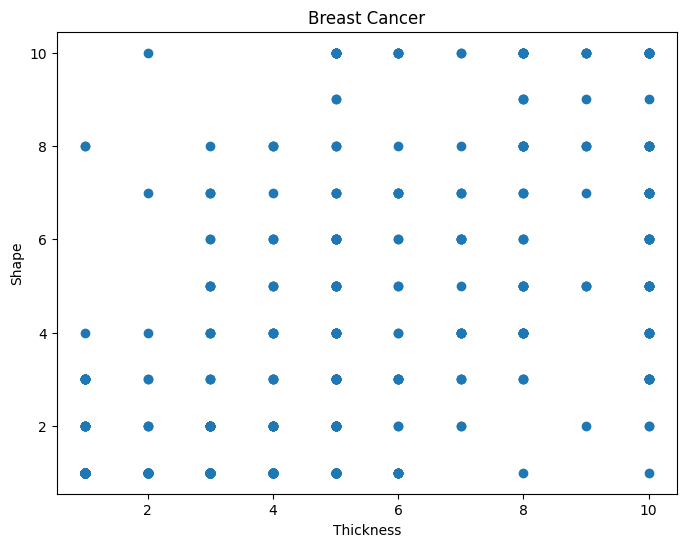

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Cl.thickness'],df['Cell.shape'])
plt.title('Breast Cancer')
plt.xlabel('Thickness')
plt.ylabel('Shape')
plt.show()

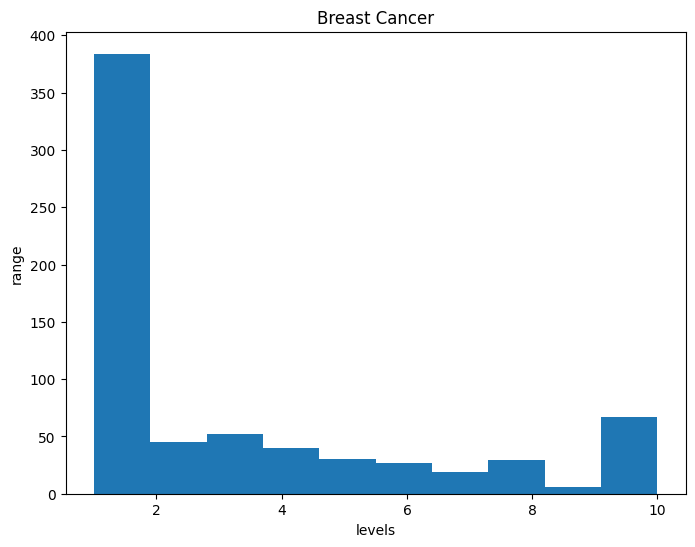

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df['Cell.size'],bins=10)
plt.xlabel('levels')
plt.ylabel('range')
plt.title('Breast Cancer')
plt.show()

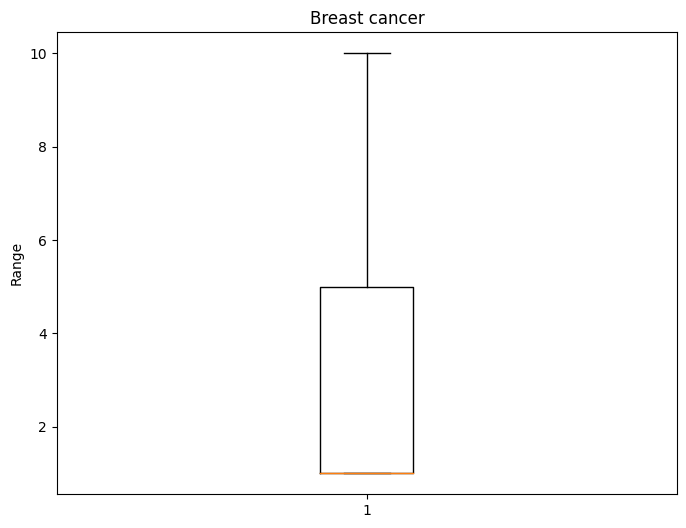

In [12]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Bare.nuclei'])
plt.title('Breast cancer')
plt.ylabel('Range')
plt.show()


Split the data into training set and testing set.

In [20]:
x = df.drop('Class',axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Feature scaling using standardscalar

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train a Logistic regression model

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [23]:
co_eff = log_reg.coef_
intercept = log_reg.intercept_
print('Coefficients:', co_eff)
print('Intercept:', intercept)

Coefficients: [[0.09564501 1.38377998 0.15399264 0.76150177 0.9290387  0.34606158
  1.31240818 0.80477385 0.46955842 0.68124149]]
Intercept: [-1.2893199]


In [24]:
y_pred_logreg =log_reg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Logistic Regression Accuracy:', accuracy_logreg)
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix_logreg)

Logistic Regression Accuracy: 0.9714285714285714
Logistic Regression Confusion Matrix:
[[82  3]
 [ 1 54]]


 KNN classification model for the dataset.

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('KNN Classification Accuracy:', accuracy_knn)
print('KNN Classification Confusion Matrix:')
print(confusion_matrix_knn)

KNN Classification Accuracy: 0.9642857142857143
KNN Classification Confusion Matrix:
[[83  2]
 [ 3 52]]
